<a href="https://colab.research.google.com/github/dlbkv/AI-Step/blob/master/module6/lab21_text_classification2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Завдання

* Завантажте усі датафрейми
* Добавте до кожного стовпчик `labels` з відповідним йому класом(bussiness, sports, education, etc). назви класів беріть з назв файлів
* Об'єднайте всі датафрейми в один, див [pd.concat](https://pandas.pydata.org/docs/reference/api/pandas.concat.html)
* Створіть стовпчик `text` в якому зберігатиметься текст для подальшої роботи. Можети вибрати такі варіанти:
  * Взяти один зі стовпчиків `headline`, `description`, `content`
  * Об'єднати тексти зі стовпчиків `headline`, `description`, `content`
* Видаліть стовпчики `headline`, `description`, `content`, `url`
* Розділіть дані на тренувальні та тестові
* Застосуйте `TfidfVectorizer`
* Натренуйте модель
* Виведіть результати

**Додатково**
* У `MyTokenizer` добавте обробку тексту за допомогою `nltk`, застусуйте один з варіантів:
  * стематизація
  * лематизація(використайте `nltk.pos_tag` для визначення частини мови)
  * обидва варіанти
* Використайте `n-gram` для класифікації(можливо доведеться збільшити `max_features`)
* Натренуйте різні моделі:
  * [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)
  * [GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB)
  * [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) з параметром `kernel="linear"`
  * [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) з параметром `kernel="rbf"`
  * [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier)
* Використайте `optuna` для підбору гіперпараметрів


# Дані про статті

In [ ]:
import pandas as pd

df_business = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module6/data/business_data.csv")
df_education = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module6/data/education_data.csv")
df_entertaiment = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module6/data/entertainment_data.csv")
df_sports = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module6/data/sports_data.csv")
df_technology = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module6/data/technology_data.csv")

df = pd.concat([df_business, df_education, df_entertaiment, df_sports, df_technology])
df['text'] = df['headlines'] + ' ' + df['description'] + ' ' + df['content']
df.drop(columns=['headlines', 'description', 'content', 'url'], inplace=True)

In [ ]:
df

,category,text
0,business,Nirmala Sitharaman to equal Morarji Desai’s re...
1,business,"‘Will densify network, want to be at least no...."
2,business,Air India group to induct an aircraft every si...
3,business,Red Sea woes: Exporters seek increased credit ...
4,business,Air India group to induct a plane every 6 days...
...,...,...
1995,technology,Vivaldi’s privacy and customisability-focused ...
1996,technology,"From Meta Quest 3 to Ray Ban Smart Glasses, he..."
1997,technology,Samsung Galaxy S24 rumoured to launch on Janua...
1998,technology,"‘We continuously iterate… building prototypes,..."


In [ ]:
from sklearn.model_selection import train_test_split


X = df['text']
y = df['category']

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, stratify=y)

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import string
from nltk.corpus import stopwords
nltk.download("stopwords")
nltk.download('punkt')
nltk.download('wordnet')

class MyTokenizer:
     def __init__(self, stemmatize=False, lemmatize=False, stop_words=False):
         self.stemmatize = stemmatize
         self.lemmatize = lemmatize
         self.stop_words = stop_words

     def __call__(self, text):
      words = word_tokenize(text)
      if self.stop_words:
        stop_words = set(stopwords.words("english"))
        words = [word for word in words if word.lower() not in stop_words]

      words = [word for word in words if word.lower() not in string.punctuation]

      if self.stemmatize:
        stemmer = PorterStemmer()
        words = [stemmer.stem(word.lower()) for word in words]

      if self.lemmatize:
        lemmatizer = WordNetLemmatizer()
        words = [lemmatizer.lemmatize(word.lower()) for word in words]

      return words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Нужно будет покомбинироватьразные варианты
tokenizer = MyTokenizer(stemmatize=True, lemmatize=True, stop_words=True)
vectorizer = TfidfVectorizer(max_features=5000, tokenizer=tokenizer)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
from sklearn.decomposition import TruncatedSVD

pca = TruncatedSVD(1000)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
pca.explained_variance_ratio_.sum()

0.7116182250720839

In [ ]:
X_train.shape

(8000, 1000)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight="balanced")

model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [ ]:
y_pred = model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

     business       0.97      0.97      0.97       400
    education       1.00      0.98      0.99       400
entertainment       1.00      0.99      1.00       400
       sports       0.99      1.00      0.99       400
   technology       0.97      0.98      0.97       400

     accuracy                           0.98      2000
    macro avg       0.99      0.99      0.99      2000
 weighted avg       0.99      0.98      0.99      2000



[]

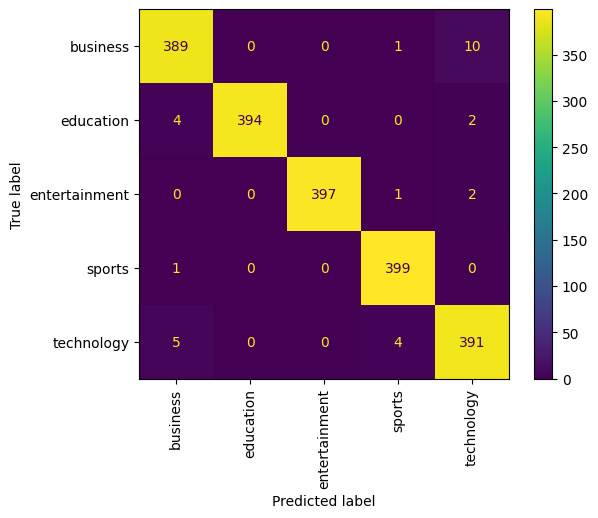

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt


ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.xticks(rotation=90)
plt.plot()

In [ ]:
from sklearn.pipeline import Pipeline

final_model = Pipeline(steps=[
    ('vectorizer', vectorizer),
    ('pca', pca),
    ('model', model)
])

final_model

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_features=5000,
                                 tokenizer=<__main__.MyTokenizer object at 0x798e2dc86620>)),
                ('pca', TruncatedSVD(n_components=1000)),
                ('model', LogisticRegression(class_weight='balanced'))])